In this notebook several questions will be investigated and answered, using a fashion retailer's e-commerce sales data. This retailer's focus is on menswear and providing high-quality and well-fitted t-shirts, trousers, jeans and shorts to men. Dataset represents real sales data between November 1st, 2018 - April 30th, 2019 and it is pseudonymized for confidentiality. Analysis is done with the following libraries:

pandas

seaborn

matplotlib

ipywidgets

information on gross sales and net sales:
    https://www.accountingtools.com/articles/what-is-the-difference-between-gross-sales-and-net-sales.html

In [1]:
# data wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# for interactive graphs
from ipywidgets import interact, interact_manual
import ipywidgets as widgets

%matplotlib inline
# to include graphs inline within the frontends next to code

%config InlineBackend.figure_format='retina'
#to enable retina (high resolution) plots

In [2]:
# load data frame
orders = pd.read_csv('Orders_Analysis_Task.csv')
# orders.set_index('day',drop='day')
# orders['day'] = pd.to_datetime(orders['day'])
orders.head(10)


,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,04/12/2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,01/04/2019,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,05/11/2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
5,OTH,Product F,40 / B / FtO,53-5CA-7CF-8F5-9-28CB78B,43823868,4121004,53616575668264,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
6,OTH,Product F,40 / B / FtO,53-5CA-7CF-8F5-9-28CB78B,43823868,4121004,29263220319421,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
7,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,13666410519728,20/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
8,OTH,Product F,40 / C / FtO,8B-2C5-548-6C6-E-B5EECBC,43823868,4121004,80657249973427,22/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
9,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,48128811961800,04/12/2018,1,100.0,-100.00,0.00,0.0,0.0,0.0,0,1


Product variant = if a product such as a t-shirt is available in five different sizes and four different colors, then there is a total of 20 variations of the same product.

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_title           70052 non-null  object 
 1   product_type            70052 non-null  object 
 2   variant_title           70052 non-null  object 
 3   variant_sku             70052 non-null  object 
 4   variant_id              70052 non-null  int64  
 5   customer_id             70052 non-null  int64  
 6   order_id                70052 non-null  int64  
 7   day                     70052 non-null  object 
 8   net_quantity            70052 non-null  int64  
 9   gross_sales             70052 non-null  float64
 10  discounts               70052 non-null  float64
 11  returns                 70052 non-null  float64
 12  net_sales               70052 non-null  float64
 13  taxes                   70052 non-null  float64
 14  total_sales             70052 non-null

In [4]:
# descriptive statistics
orders.describe()

,variant_id,customer_id,order_id,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
count,7.005200e+04,7.005200e+04,7.005200e+04,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000
mean,2.442320e+11,6.013091e+11,5.506075e+13,0.701179,61.776302,-4.949904,-10.246051,46.580348,9.123636,55.703982,-0.156098,0.857277
std,4.255079e+12,6.223201e+12,2.587640e+13,0.739497,31.800689,7.769972,25.154677,51.802690,10.305236,61.920557,0.369190,0.380820
min,1.001447e+07,1.000661e+06,1.000657e+13,-3.000000,0.000000,-200.000000,-237.500000,-237.500000,-47.500000,-285.000000,-3.000000,0.000000
25%,2.692223e+07,3.295695e+06,3.270317e+13,1.000000,51.670000,-8.340000,0.000000,47.080000,8.375000,56.227500,0.000000,1.000000
50%,4.494514e+07,5.566107e+06,5.522207e+13,1.000000,74.170000,0.000000,0.000000,63.330000,12.660000,76.000000,0.000000,1.000000
75%,7.743106e+07,7.815352e+06,7.736876e+13,1.000000,79.170000,0.000000,0.000000,74.170000,14.840000,89.000000,0.000000,1.000000
max,8.422212e+13,9.977409e+13,9.999554e+13,6.000000,445.000000,0.000000,0.000000,445.000000,63.340000,445.000000,0.000000,6.000000


In [5]:
# list the rows taht company achieved most any kind of sales for a given limit
@interact
def show_sales_more_than(column = ['gross_sales', 'net_sales', 'total_sales'],
                         x = widgets.IntSlider(min=0, max=500, step=10)):
#     print(orders.loc[orders[column] > x])
    return orders.loc[orders[column] > x]


interactive(children=(Dropdown(description='column', options=('gross_sales', 'net_sales', 'total_sales'), valu…

In [6]:
# interactive scatterplot to visualize relationships between the numerical columns of the dataframe
@interact
def scatter_plot(x=list(orders.select_dtypes(["int64", "float64"]).columns), 
                 y=list(orders.select_dtypes(["int64", "float64"]).columns)[1:]):
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=x, y=y, data=orders)
    plt.ticklabel_format(style='plain', axis='y')
    plt.title('%(y_title)s VS %(x_title)s' % {"y_title": y, "x_title": x})

interactive(children=(Dropdown(description='x', options=('variant_id', 'customer_id', 'order_id', 'net_quantit…

# 1) On what day did we make the most Gross Sales? Why would it make sense for this to be our biggest sales day?

In [7]:
orders_by_day = orders.groupby('day')\
                        .gross_sales.sum()\
                        .reset_index()\
                        .sort_values(by=['gross_sales'], ascending=False)
orders_by_day.head(10)

,day,gross_sales
136,23/11/2018,179394.23
154,26/11/2018,135499.95
142,24/11/2018,85951.77
155,26/12/2018,83141.42
6,02/01/2019,81625.21
148,25/11/2018,63326.32
83,14/12/2018,62913.18
44,08/03/2019,59965.48
165,28/04/2019,57607.86
159,27/04/2019,54576.63


observations:

Biggest Sales happened around :
* 23-26th of November, 2018 : Black-Friday ,where people are promoted to do shopping massively with crazy discount rates.
* 2nd of January, 2019 and 26th of December, 2018: Christmas Eve and afterwards, holiday season shows its effects even after the New Year's with high sales.

It makes sense since these dates corresponds to gift and shopping seasons.

Total sales could give an alternative picture for this question, since it is the final amount after discounts, returns and tax. It also reflects how discounts affects purchasing decisions.

    

In [8]:
orders_by_day = orders.groupby('day')\
                        .total_sales.sum()\
                        .reset_index()\
                        .sort_values(by='total_sales', ascending=False).head()
orders_by_day

,day,total_sales
136,23/11/2018,162191.09
154,26/11/2018,117613.61
155,26/12/2018,95914.50
6,02/01/2019,87628.85
142,24/11/2018,82978.85


Sorting did not change much, biggest gross sales and total sales occured in the same days, invalidating my earlier suspicion.

# Which product type did we sell the most units of? What business decisions could we make knowing this information?

In [9]:
orders[orders['ordered_item_quantity']==0].head()



,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
59295,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,13666410519728,01/03/2019,-1,0.0,0.0,0.0,0.0,0.0,0.0,-1,0
59300,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,23/02/2019,-1,0.0,0.0,0.0,0.0,0.0,0.0,-1,0
59305,RJF,Product T,28 / A / 9,4D-D1F-A14-8D9-0-FD0E84A,31355561,3715657,93146430228825,04/12/2018,-1,0.0,0.0,0.0,0.0,0.0,0.0,-1,0
59314,OTH,Product F,40 / B / FtO,53-5CA-7CF-8F5-9-28CB78B,43823868,4121004,53616575668264,23/02/2019,-1,0.0,0.0,0.0,0.0,0.0,0.0,-1,0
59328,YQX,Product H,40 / B / FtO,F2-055-4C3-8C3-0-7070F1D,25826279,4121004,13666410519728,01/03/2019,-1,0.0,0.0,0.0,0.0,0.0,0.0,-1,0


there are some products whose 'ordered_item_quantity' is zero but 'net_quantity' is less than 0. that is items were returned without being purchased. but the fact that they have returns requires investigation.

In [10]:
print('Number of rows that net quantity is negative:',orders[orders['net_quantity']<0].shape[0])
# exclude not sold/ordered SKUs from the dataset
positive_orders = orders[orders["ordered_item_quantity"] > 0]

Number of rows that net quantity is negative: 10715


These rows will be excluded from the orders dataset for questions 2, 3, 4, since they distort the analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

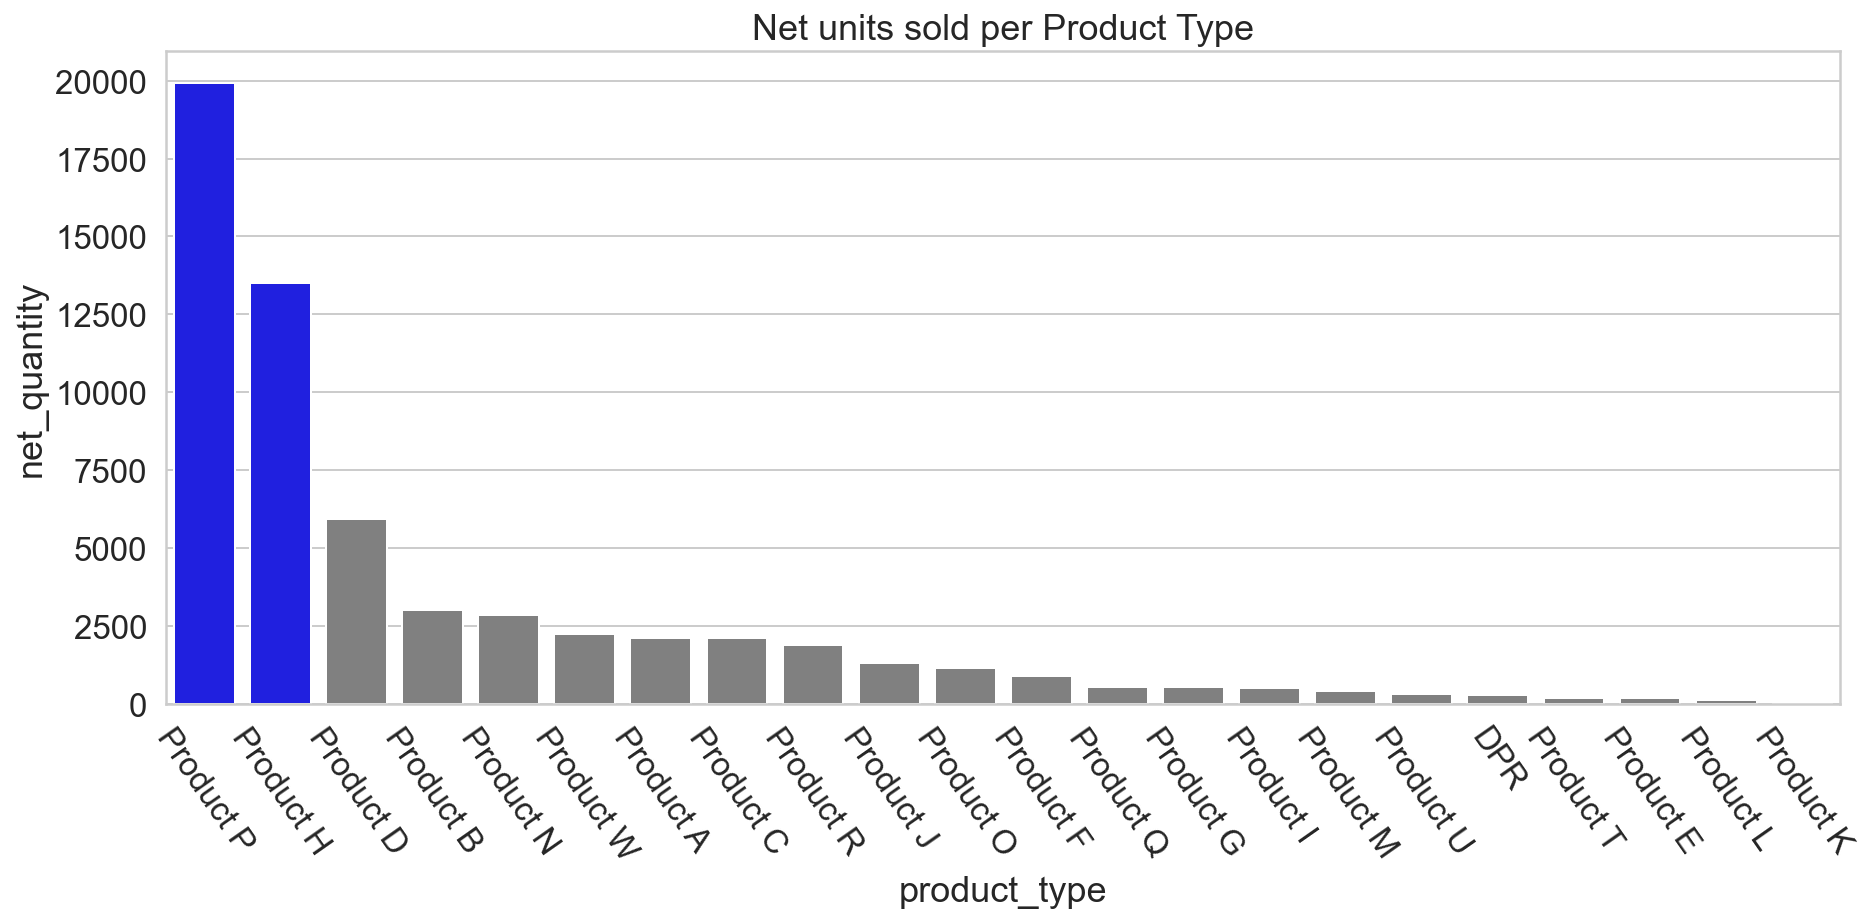

In [11]:
orders_by_product_type = orders[orders['net_quantity']>0].groupby('product_type')\
                                .net_quantity.sum()\
                                .reset_index()\
                                .sort_values(by=['net_quantity'],ascending=False)

# prepare plot
figure = plt.figure(figsize=(15,6))
sns.set(style='whitegrid', font_scale=1.5)

#set color
labels = np.array(orders_by_product_type.product_type)
values = np.array(orders_by_product_type.net_quantity)
color = ['grey' if (x < 7500 ) else 'blue' for x in values]  # color for each bar 

#set the plot
ax = sns.barplot(x='product_type', y='net_quantity',
                 data= orders_by_product_type, palette=color)

# set title and arrange x ticks
plt.title('Net units sold per Product Type')
plt.xticks(rotation=(270+35))    

Product P and H have outnumbered other categories in net unit sales.

* Product P is the minimal and simple design of the retailer with a contemporary look.
* Product H is the signature design of the retailer with a classic and smart casual look.

Business Decisions:

* Simple, Casual and simple looks appeal more customers.
* if company want to grow in terms of revenue, launch or targeted marketing of simple, casual and classic trousers can help.
* Collections that are not depending on seasons attract more people.
* Frequency of purchase or bulk purchase with multiple colors for Product P and H collections might be higher than the       other collections, since it seems they are filling the gap for the must-have's of a men's wardrobe.
* Those collections inventory level must be higher than other collections, to prevent probability of stock out.

# What does the distribution of waist sizes look like? What does this say about our existing customer base?

In [12]:
# waist size if applicable for trousers, shorts, denims
# create new dataframe for those

trousers = positive_orders[(positive_orders.product_type != 'DPR') & 
                           (positive_orders.product_type != 'Product R') &
                           (positive_orders.product_type != 'Product N')].copy()

# waist size is embedded in the variant_title as first item: waist_size / other size /  other size
# fetch waist_size from the variant_title and convert to integer

trousers['waist_size'] = (trousers.variant_title
                          .apply(lambda x: x.split()[0]))

trousers['waist_size']= trousers['waist_size'].astype(int)

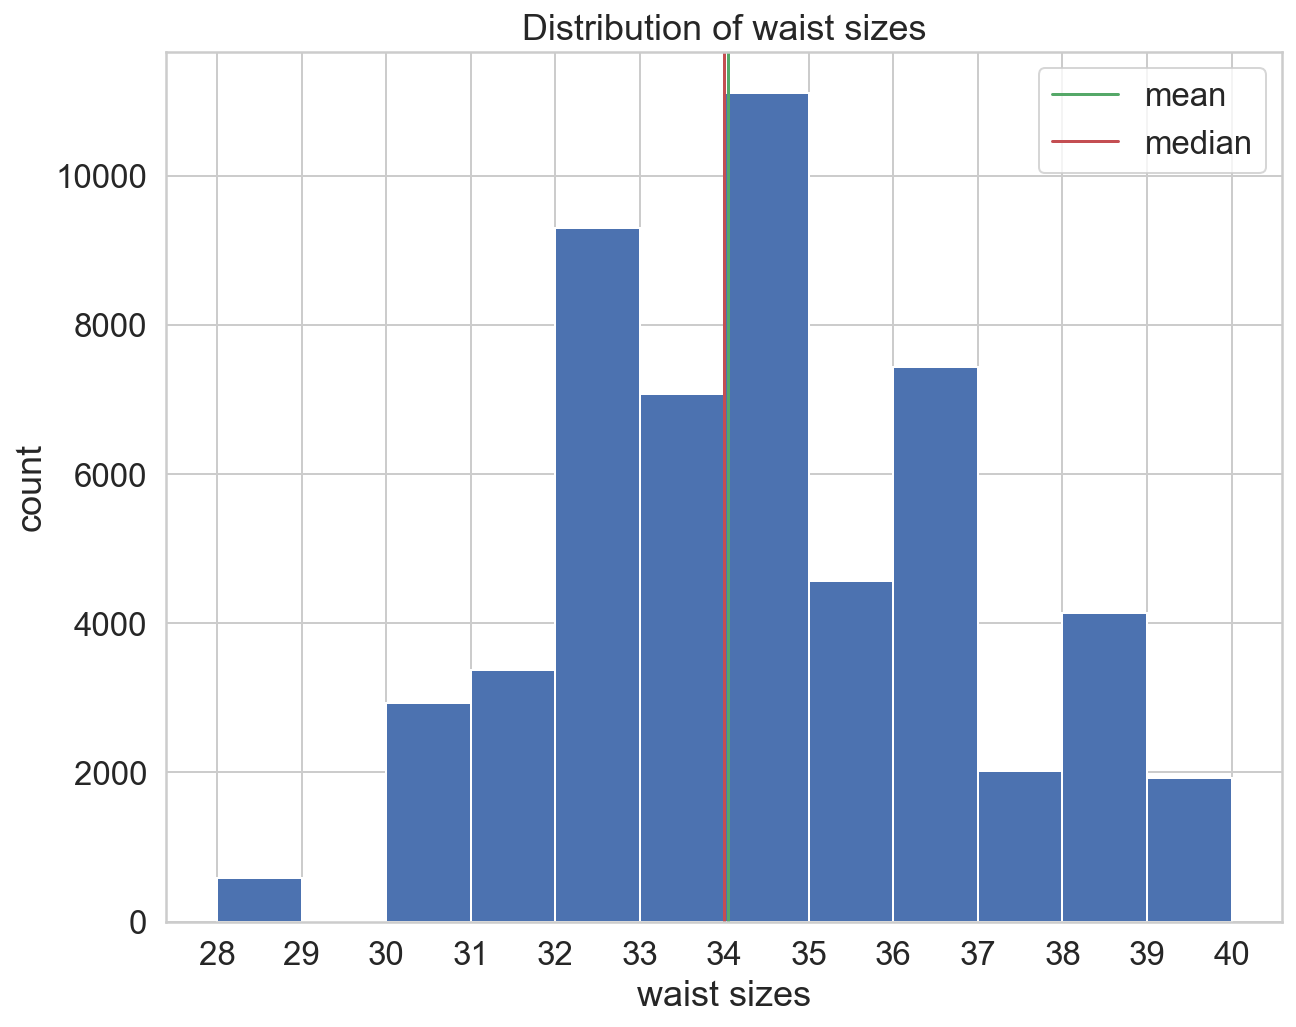

In [13]:
# waist size of trousers
fig=plt.figure(figsize=(10,8))
plt.hist(trousers['waist_size'],bins=12)  # since there are 12 sizes from 28 to 40

# plot mean and median
plt.axvline(x=trousers['waist_size'].mean(), color='g', label='mean')
plt.axvline(x=trousers['waist_size'].median(),  color='r', label='median')

# set title, legends, and xticks
plt.xticks(range(28,41))
plt.xlabel('waist sizes')
plt.ylabel('count')
plt.title('Distribution of waist sizes')
plt.legend();


* Distribution has a peak at waist size= 34
* customers base is more concentrated in range 32-36.
* Data is centered around the mean and median, 34, as mid-waist-size
* This data is very useful to plan for production quantities of trousers/short/jeans of different sizes.
* Also, during a new category launch, more mid waist sizes should be considered for production.


 ### What if we look at distribution of the waist size per collection, what results will it yield?

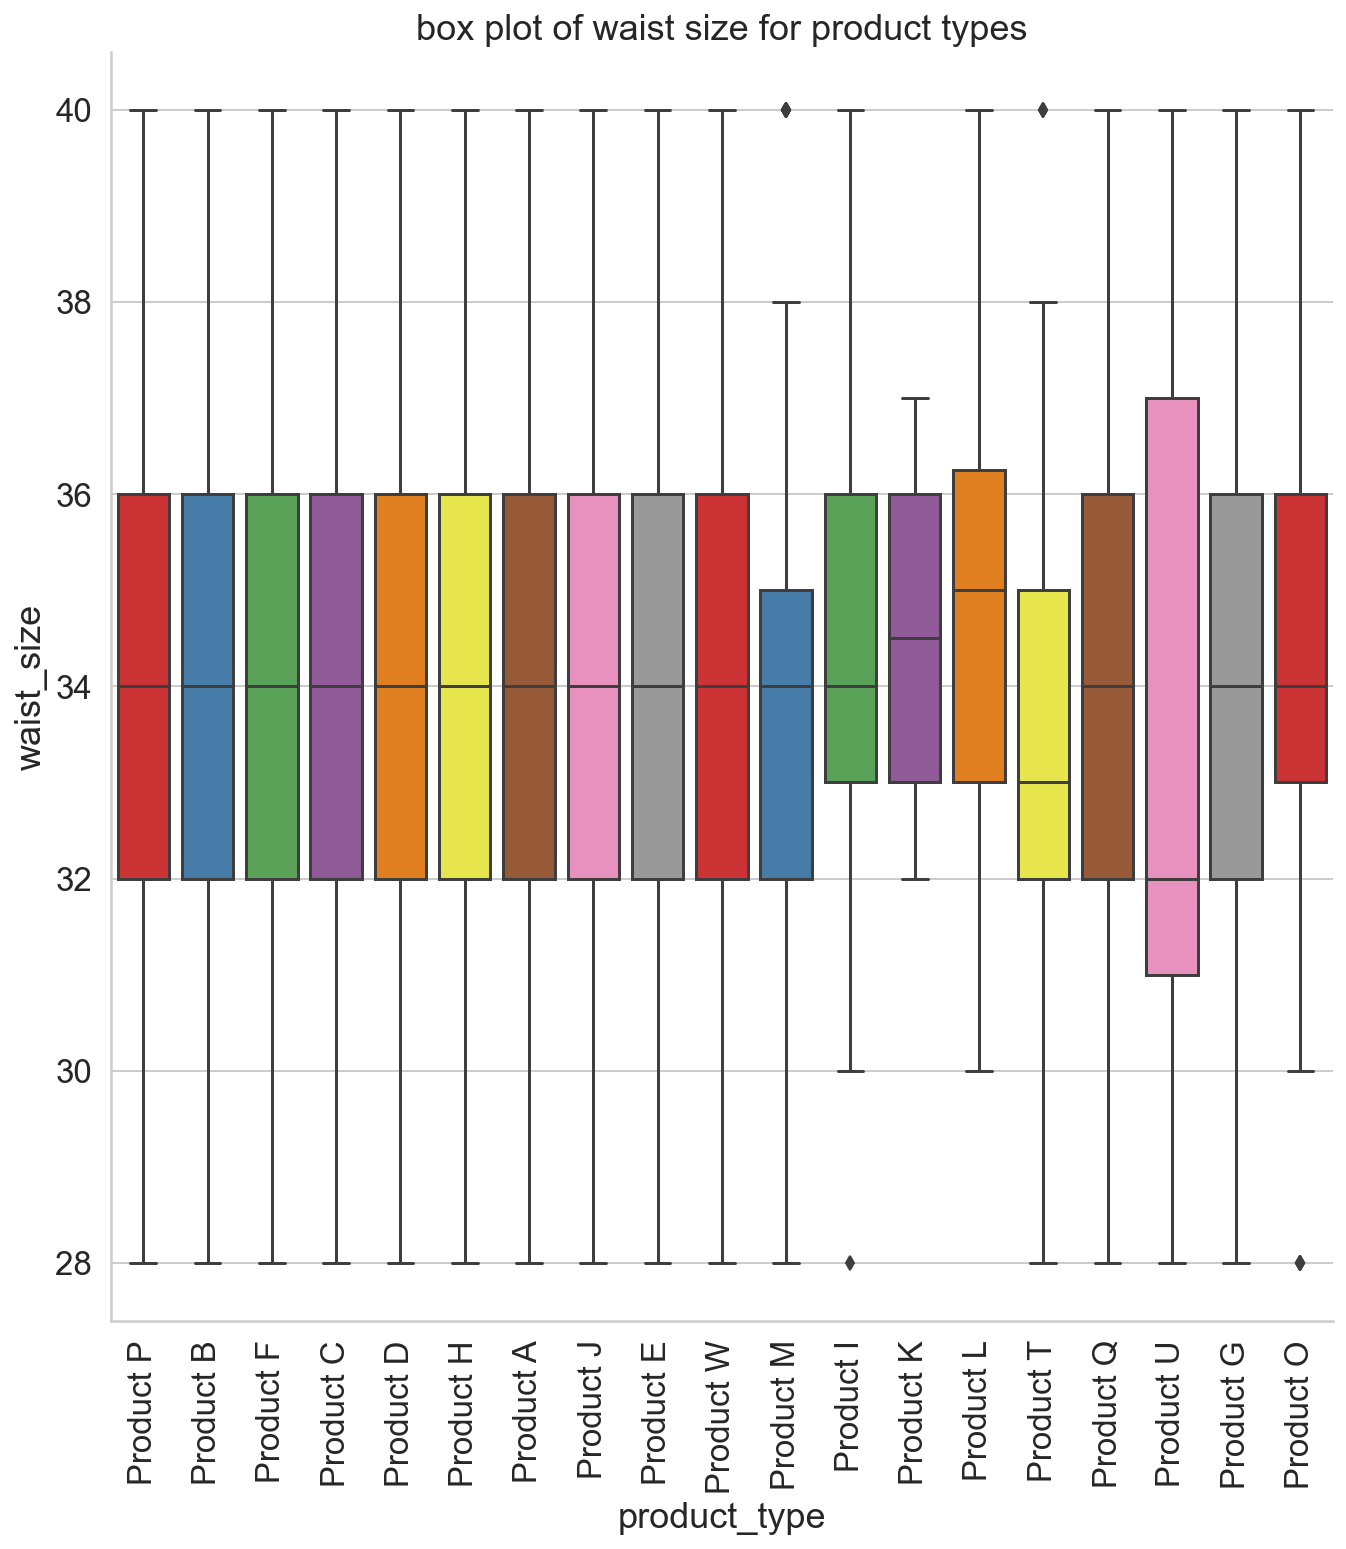

In [14]:

g = sns.catplot(x='product_type', y='waist_size',
               data=trousers, kind='box', height=10,
               palette = 'Set1')
g.set_xticklabels(rotation=90)
plt.title('box plot of waist size for product types');

As expected, waist size is concentrated around 32-36 

# What is our unit return rate? Bonus points: what is our unit return rate for customers who ordered multiple sizes?

In [15]:
# to look at unit return rate, ratio of all returned items to the ordered items will be investigated
returned_sum = float(-1*(positive_orders["returned_item_quantity"].sum()))

ordered_sum = float(positive_orders["ordered_item_quantity"].sum())

unit_return_rate = returned_sum / ordered_sum

print("The unit return rate is : "'%.4f'%unit_return_rate)


The unit return rate is : 0.0012


Unit return rate is %0.1, it might be benefical to investigate return rate per orders as well, which might give a better clue of return rate.

In [16]:
returned_sum_by_order = (positive_orders
                         .groupby('order_id')
                         .returned_item_quantity.sum()
                         .reset_index())
ordered_sum_by_order =  (positive_orders
                         .groupby('order_id')
                         .ordered_item_quantity.sum()
                         .reset_index())

orders_by_order_id = pd.merge(ordered_sum_by_order, returned_sum_by_order)

orders_by_order_id['return_rate'] = ((-1 * orders_by_order_id['returned_item_quantity'])/
                                         orders_by_order_id['ordered_item_quantity'])
print('Average return rate per order id {%.4f}'%orders_by_order_id['return_rate'].mean() )
orders_by_order_id.head()

Average return rate per order id {0.0014}


,order_id,ordered_item_quantity,returned_item_quantity,return_rate
0,10006570316892,1,0,0.0
1,10014506873501,2,0,0.0
2,10025999949327,1,0,0.0
3,10031056675364,1,0,0.0
4,10031124126768,1,0,0.0


### Unit return rate for customers who ordered multiple sizes

* To answer this question, tshirts and trousers/shorts/jeans will be considered seperately.
* Size is considered S, M, L, XL (and so on) for t-shirts and waist size for trousers/jeans/shorts. Rest of the elements in   the variant_title considered as cuts.
* Trousers dataframe that is created for question 3 will be used for this analysis.
* Tshirts dataframe will be created.

***create tshirt dataframe and add size column***

In [17]:
tshirts = positive_orders[(positive_orders.product_type=='Product R') |
                        (positive_orders.product_type=='Product N')].copy()

tshirts ['size'] = (tshirts
                    .variant_title.apply(lambda x : x.split()[0]))

***Create functions to identify customers who order multiple sizes***

In [18]:
def encode_sizes(column):
    '''function to encode a size into 1 if bought, 0 if not bought'''
    if column > 0:
        return 1
    if column <= 0:
        return 0

def aggregate_by_ordered_quantity(dataframe, column_list):
    '''this function:
    1. aggregates a given dataframe by column list, 
    as a result creates a aggregated dataframe by counting the ordered item quantities
    
    2. Encode: adds 'number_of_sizes_ordered' column to the aggregated dataframe by encoding ordered sizes into 1
    
    3. creates final dataframe containing information about 
    how many sizes are ordered, based on the first element passed in the column list'''
    
    aggregated_dataframe = (dataframe
                            .groupby(column_list)
                            .ordered_item_quantity.count()
                            .reset_index())
    
    aggregated_dataframe["num_of_sizes_ordered"] = (aggregated_dataframe
                                                    .ordered_item_quantity
                                                    .apply(encode_sizes))
    final_dataframe = (aggregated_dataframe
                       .groupby(column_list[0])
                       .num_of_sizes_ordered.sum()
                       .reset_index())
    
    return final_dataframe

In [19]:

# apply functions to trousers
customers_by_size_orders1 = aggregate_by_ordered_quantity(trousers, ["customer_id", "waist_size"])
print("for trousers/jeans/denims:")
print(customers_by_size_orders1)

# apply functions to trousers
customers_by_size_orders2 = aggregate_by_ordered_quantity(tshirts, ["customer_id", "size"])
print("for tshirts:")
print(customers_by_size_orders2)

customer_by_size_orders = (pd.concat([customers_by_size_orders1
                                      [customers_by_size_orders1.num_of_sizes_ordered >1] ,
                                      customers_by_size_orders2
                                      [customers_by_size_orders2.num_of_sizes_ordered >1]
                                     ]
                                    ))
#since a customer can buy multiple sizes in shirts as well as trousers , 
# we will add no of orders in shirts and trousers for those customers
customer_by_size_orders = (customer_by_size_orders
                           .groupby('customer_id')
                           .num_of_sizes_ordered.sum())

for trousers/jeans/denims:
          customer_id  num_of_sizes_ordered
0             1000661                     1
1             1001914                     1
2             1002167                     1
3             1002387                     1
4             1002419                     1
...               ...                   ...
24303  97805007741979                     1
24304  98854671633650                     1
24305  98974226154136                     1
24306  99262726332691                     2
24307  99549917598660                     1

[24308 rows x 2 columns]
for tshirts:
         customer_id  num_of_sizes_ordered
0            1006436                     1
1            1013613                     1
2            1016212                     1
3            1017090                     1
4            1021299                     1
...              ...                   ...
2718  71640640924058                     1
2719  72502421943749                     2
2720  8020025426462

#### Prepare datasets for unit return rate calculation

In [20]:
# aggregate data per customer_id, to see ordered item sum and returned sum per customer
returned_sum_by_customer = (positive_orders
                         .groupby('customer_id')
                         .returned_item_quantity.sum()
                         .reset_index())
ordered_sum_by_customer =  (positive_orders
                         .groupby('customer_id')
                         .ordered_item_quantity.sum()
                         .reset_index())

# merge two dataframes to be able to calculate unit return rate
orders_by_customer_id = pd.merge(ordered_sum_by_customer, returned_sum_by_customer)

customer_with_multiple_orders = pd.merge(customer_by_size_orders, orders_by_customer_id,
                                        on='customer_id')
customer_with_multiple_orders

,customer_id,num_of_sizes_ordered,ordered_item_quantity,returned_item_quantity
0,1003728,2,2,0
1,1003899,4,11,0
2,1006436,3,4,0
3,1006697,2,2,0
4,1007931,2,2,0
...,...,...,...,...
5378,84685734707676,2,2,0
5379,86886180036074,2,3,0
5380,97360670554629,2,2,0
5381,97805007741979,2,5,0


#### Unit return rate calculation for the identified customers

In [21]:
# to look at unit return rate for the customers ordered multiple sizes, 
# ratio of all returned items to the ordered items will be investigated
returned_sum_multiple = float(-1 * customer_with_multiple_orders.returned_item_quantity.sum())

ordered_sum_multiple = float(customer_with_multiple_orders.ordered_item_quantity.sum())

unit_return_rate_multiple = returned_sum_multiple / ordered_sum_multiple

print("The unit return rate is : "'%.4f'%unit_return_rate_multiple)

The unit return rate is : 0.0014


Looks like return rate of the company are really low in all of the 3 cases:

* unit return for all customers (0.0012)
* average return rate per order (0.0014)
* unit return rate for customers who order multiple sizes (0.0014)

# Does discounts drive the sales of the company (by looking at the number of sales without discount vs number of discounted sales)?

In [22]:
sales_without_discounts = orders[orders['discounts']==0].ordered_item_quantity.sum()


In [23]:
sales_with_discounts = orders[orders['discounts']<0].ordered_item_quantity.sum()


In [24]:
per_sales_without_discounts = sales_without_discounts/(orders['ordered_item_quantity'].sum())
per_sales_without_discounts

0.5790788290538516

In [25]:
per_sales_with_discounts = sales_with_discounts/(orders['ordered_item_quantity'].sum())
per_sales_with_discounts

0.42092117094614845

from this we can say that sales with discounts are more as compared to sales without discounts

# Does price have an affect on buying multiple items in one order?

In [26]:
orders['price/item'] = orders['gross_sales'] / orders['ordered_item_quantity']
orders.head(10)

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity,price/item
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,04/12/2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2,100.0
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,01/04/2019,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2,95.0
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,05/11/2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2,82.4
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1,119.0
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1,119.0
5,OTH,Product F,40 / B / FtO,53-5CA-7CF-8F5-9-28CB78B,43823868,4121004,53616575668264,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1,119.0
6,OTH,Product F,40 / B / FtO,53-5CA-7CF-8F5-9-28CB78B,43823868,4121004,29263220319421,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1,119.0
7,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,13666410519728,20/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1,119.0
8,OTH,Product F,40 / C / FtO,8B-2C5-548-6C6-E-B5EECBC,43823868,4121004,80657249973427,22/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1,119.0
9,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,48128811961800,04/12/2018,1,100.0,-100.00,0.00,0.0,0.0,0.0,0,1,100.0


In [27]:
orders_without_nulls = orders.dropna(axis=0)  # since price/item has NaN values for we will remove those columns

In [28]:
orders.shape

(70052, 18)

In [29]:
orders_without_nulls.shape

(59337, 18)

In [30]:
frame = orders_without_nulls[['ordered_item_quantity','price/item']].sort_values(by='price/item')
frame[frame['ordered_item_quantity']>1]['price/item'].mode()[0]

79.165

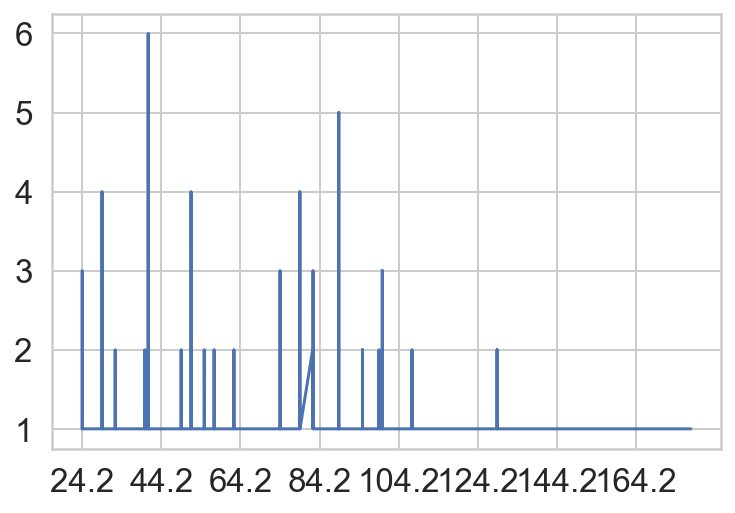

In [31]:
plt.plot(frame['price/item'], frame['ordered_item_quantity'])
plt.xticks(np.arange(frame['price/item'].min() , frame['price/item'].max(), step=20));

Lower price range (25-104$) products are purchased